In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
import pandas_datareader as data

In [188]:
import yfinance as yf

# Define the stock symbol and date range
symbol = "PYPL"
start_date = "2010-01-01"
end_date = "2024-08-03"

# Fetch data
# Assuming you have a dataset with dates
date_range = pd.date_range(start=start_date, periods=len(y_test), freq='D')

df = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2015-07-06  38.000000  39.750000  36.000000  36.709999  36.709999  5866600
2015-07-07  37.720001  37.810001  36.000000  36.619999  36.619999  7359000
2015-07-08  36.340000  36.360001  34.529999  34.700001  34.700001  5387700
2015-07-09  35.099998  35.520000  33.990002  34.500000  34.500000  3760100
2015-07-10  34.660000  35.189999  33.980000  34.689999  34.689999  4472800


In [189]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600
1,2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000
2,2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700
3,2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100
4,2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800


In [190]:
df=df.drop(["Date","Adj Close"],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,38.000000,39.750000,36.000000,36.709999,5866600
1,37.720001,37.810001,36.000000,36.619999,7359000
2,36.340000,36.360001,34.529999,34.700001,5387700
3,35.099998,35.520000,33.990002,34.500000,3760100
4,34.660000,35.189999,33.980000,34.689999,4472800


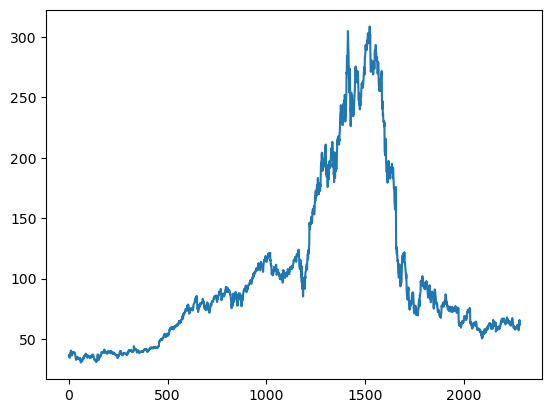

In [191]:
plt.plot(df.Close)

In [192]:
ma100=df.Close.rolling(100).mean()

In [193]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2281    62.69915
2282    62.75795
2283    62.83075
2284    62.89375
2285    62.91275
Name: Close, Length: 2286, dtype: float64

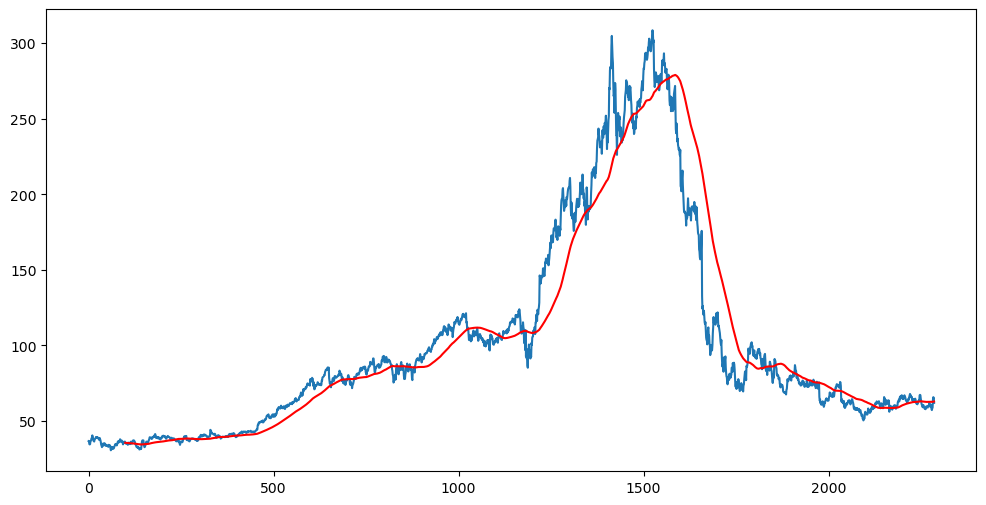

In [194]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [195]:
ma200=df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2281    62.69915
2282    62.75795
2283    62.83075
2284    62.89375
2285    62.91275
Name: Close, Length: 2286, dtype: float64

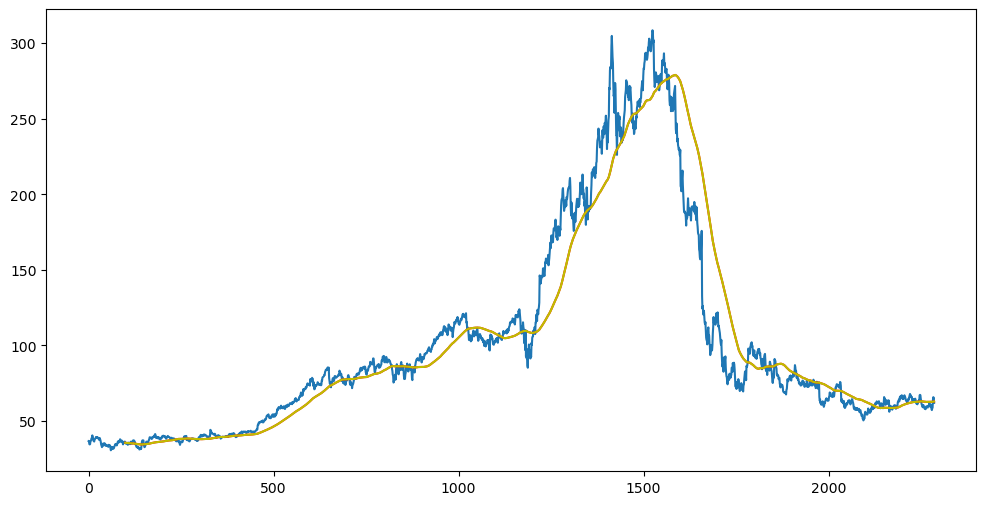

In [196]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"y")


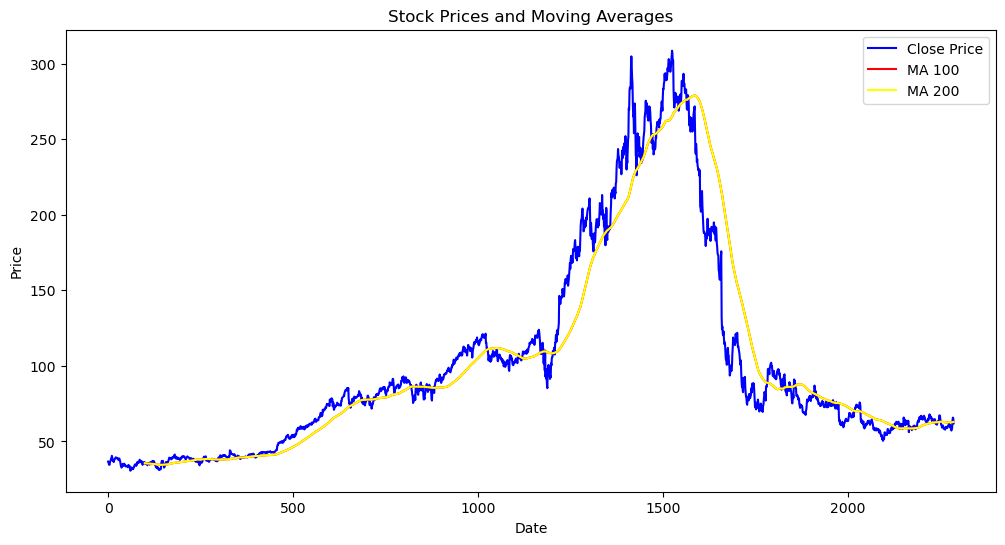

In [197]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot Close prices
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Plot 100-day moving average
plt.plot(df.index, ma100, label='MA 100', color='red')

# Plot 200-day moving average
plt.plot(df.index, ma200, label='MA 200', color='yellow')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Show plot
plt.show()

In [198]:
df.shape

(2286, 5)

In [199]:
###  Splitting Data into Training and Testing
data_training=pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1600, 1)
(686, 1)


In [200]:
data_testing.head()

,Close
1600,205.419998
1601,204.639999
1602,202.029999
1603,208.300003
1604,212.539993


In [201]:
data_training.head()

,Close
0,36.709999
1,36.619999
2,34.700001
3,34.500000
4,34.689999


In [202]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df.values.reshape(-1, 1))


In [203]:
# Prepare data for LSTM
def create_dataset(df, time_step=1):
    X, y = [], []
    for i in range(len(df)-time_step-1):
        X.append(df[i:(i+time_step), 0])
        y.append(df[i + time_step, 0])
    return np.array(X), np.array(y)


In [204]:
time_step = 10
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [205]:
# Split data
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [206]:
## Ml Model 

In [207]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [208]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

C:\Users\Akshay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0012
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.9618e-04
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 9.3176e-04
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 8.9325e-04
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 5.6230e-04
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 6.0705e-04
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.8651e-04
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.6123e-04
Epoch 9/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.2419e-04
Epoch 10/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.4326e-04


In [211]:
model.save("Paypal_Stoct_Tread_Prediction_model.h5")

In [212]:
# Forecast
y_pred = model.predict(X_test)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [213]:
# Reshape y_pred and y_test
if y_pred.ndim == 3:
    y_pred = y_pred.reshape(-1, 1)
elif y_pred.ndim == 2:
    y_pred = y_pred[:, 0]

y_test = y_test.reshape(-1, 1)

In [214]:
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [215]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


In [217]:
date_range = pd.date_range(start='2010-01-01', periods=len(y_test))  # Adjust start date accordingly


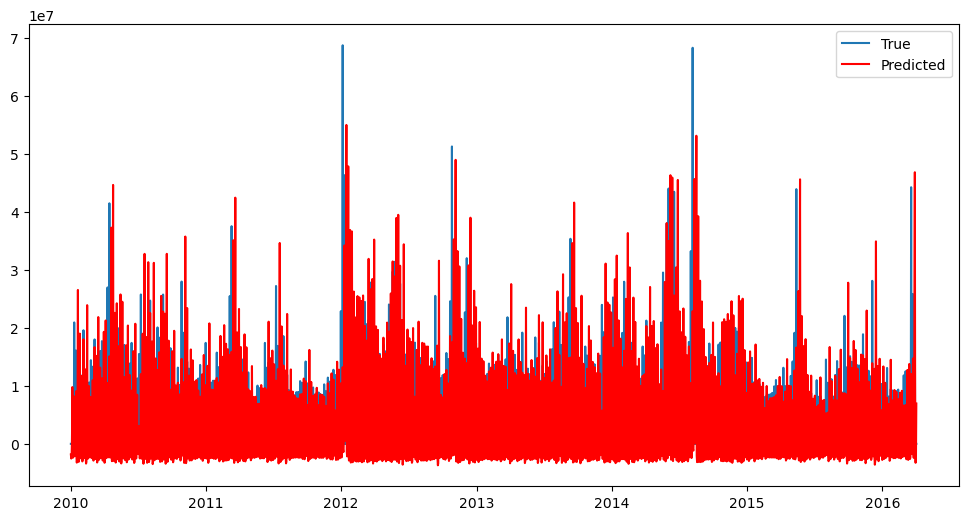

In [218]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(date_range[-len(y_test):], y_test, label='True')
plt.plot(date_range[-len(y_test):], y_pred, label='Predicted', color='red')
plt.legend()
plt.show()